#Iris veri seti 

## Iris Veri seti nedir?

İris çiçeği veri seti veya diğer adıyla Fisher'in İris veri seti, çok değişkenli veri seti olarak ilk defa İngiliz istatistikçi , öjenist ve biyolog Ronald Fisher tarafından 1936 yılında tanıtılan veri setidir.

Bazen Anderson'ın Iris veri kümesi olarak adlandırılır. Bunun nedeni ise Edgar Anderson'ın Iris'in morfolojik varyasyonunu ölçmek için gerekli  verileri toplamasından kaynaklıydı.

Veri seti, üç Iris türünün ( Iris setosa , Iris virginica ve Iris versicolor ) her birinden 50 örnekten oluşmaktadır . 

Her numuneden dört özellik ölçülmüştür. Bunlar çanak yaprakların ve taç yaprakların santimetre cinsinden uzunluğu ve genişliğidir.

Bu dört özelliğin birleşimine dayanarak Fisher, türleri birbirinden ayırmak için doğrusal bir ayırt edici model geliştirmiştir.

**Iris Versicolor**

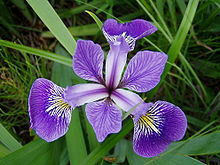

**Irıs Setosa**

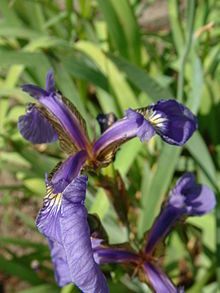

**Iris Virginica**

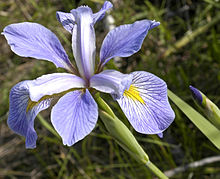

###Amaç

 Bu defter, iris çiçeği ile ilgili verilerin, düzenlenmesini, istatiksel incelenmesini ve  grafiklerle yorumlanmasını amaçlar.

##Veri setinin yüklenmesi



Verilerle işlem yapmamızı kolaylaştırıcı bazı kütüphanelerin eklenmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Verimizi link kullanarak ekliyoruz, sütünlara otomatik değer atanmaması için header=None kullandım.

In [2]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df=pd.read_csv(url,header = None)


Verimizin ilk beş satırına baktığımızda sütünların sayılarla temsil edildiğini görüyoruz.

In [ ]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Veri ön işleme

Sütünlara isim verilmesi

In [3]:
df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

Sütunlara isim verdikten sonra sütunların kontrol edilmesi

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Verimizle ilgili boyut değerlerine ulaşalım.

Verimizin 5 sutündan oluştuğunu her sütununda 150 değer taşıdığını görmekteyiz

In [ ]:
df.shape

(150, 5)

##Verinin istatiksel incelenmesi

Her niceliksel özelliğin ortalaması, standart sapması, minimum ve
maksimum değerlerini hesaplayalım.

Bu kod parçasında her sutün vektörü kendi belirlediğim değişkenlere atadım.

Buradaki amacım sütunlardaki değerlere daha kolay erişmek.

In [6]:
s1=df['sepal length']
s2=df['sepal width']
s3=df['petal length']
s4=df['petal width']
s5=df['class']


Sütunlarla ilgili parametrelerimi listeye attım bunun amacı veriyle ilgili matematiksel işlemleri rahat yapmak.

In [ ]:
str_list=(s1,s2,s3,s4,s5)
s=len(str_list)-1
s

4

4 adet içi sıg-fırlarla dolu matris oluşturdum aşağıdaki döngüde gerekli hesaplamaları yapıcaz.

In [ ]:
ort=np.zeros(s,)
min=np.zeros(s,)
max=np.zeros(s,)
std=np.zeros(s,)


Bu döngü verimizin her sutünundaki değerler ile ilgili ortalama değeri maksimum ve minumum değerleri ve standart sapmasını hesaplar. 

In [ ]:
for i in range(s):
  ort[i]=np.mean(str_list[i])
  min[i]=np.min(str_list[i])
  max[i]=np.max(str_list[i])
  std[i]=np.std(str_list[i]) 

Sıfırlardan oluşan diziler yukarda yapmış olmuduğumuz hesaplamalar sonucunda içleri birtakım değerlerlerle doldu bu değerleri yazdırabiliriz.

Verinin her sutünuyla ile ilgili ortalama değerin maksimum ve minumum değerlerin ve standart sapmanın yazdırılması.

In [ ]:

for j in range(s):
  print(ort[j],",",min[j],",",max[j],",",std[j])

5.843333333333335 , 4.3 , 7.9 , 0.8253012917851409
3.0540000000000007 , 2.0 , 4.4 , 0.4321465800705435
3.7586666666666693 , 1.0 , 6.9 , 1.7585291834055201
1.1986666666666672 , 0.1 , 2.5 , 0.760612618588172


Kod yığınlarıyla uğraşmak istemezseniz eğer, veriyle ilgili matematiksel hesapları desribe() metoduyla tablo şeklinde yazdırabilirsiniz.

In [ ]:
df.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Veriyle ilgili her sutünda kaçar örnek olduğuna count() ile erişebiliriz fakat bir sütundaki değerlere detaylı bir şekilde erişmek istediğimizde ise value_count() kullanırız.


In [ ]:
df.count()

sepal length    150
sepal width     150
petal length    150
petal width     150
class           150
dtype: int64

In [ ]:
s1.value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal length, dtype: int64

In [ ]:
s2.value_counts()

3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: sepal width, dtype: int64

In [ ]:
s3.value_counts()

1.5    14
1.4    12
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7     2
3.5     2
5.9     2
6.0     2
5.4     2
5.3     2
3.3     2
4.3     2
5.2     2
6.3     1
1.1     1
6.4     1
3.6     1
3.7     1
3.0     1
3.8     1
6.6     1
6.9     1
1.0     1
Name: petal length, dtype: int64

In [ ]:
s4.value_counts()

0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
0.1     6
2.0     6
2.1     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal width, dtype: int64

In [ ]:
s5.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Özniteliklerin korelasyonu

In [ ]:
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


Özniteliklerin kovaryansı

In [ ]:
df.cov()

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


##Veri görselleştirme

**Histogram**

Text(0, 0.5, 'Sayı')

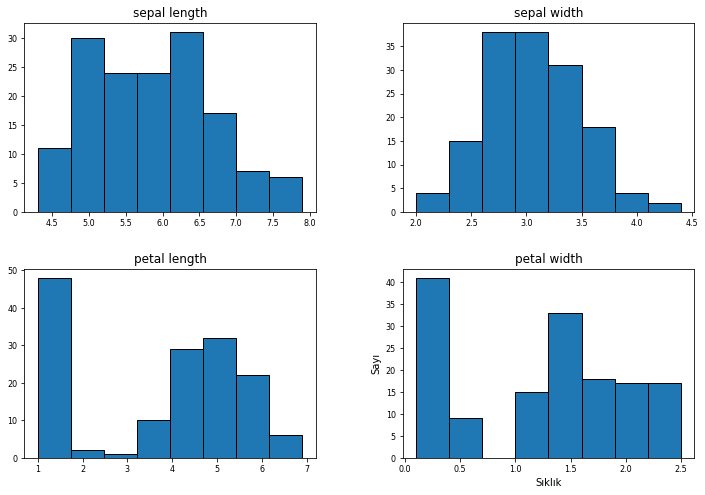

In [ ]:
df.hist(bins=8,xlabelsize=8,ylabelsize=8,edgecolor="black",grid=False,figsize=(12,8))
plt.xlabel("Sıklık")
plt.ylabel("Sayı")


Grafikten çıkarımımız : 

Her bir figürün x ekseni veri seti içindeki ilgili sütunlarındaki sıklığına y ekseninde ise ilgili sütunda kaç adet olduğunu anlıyoruz. 

**Box Plot**

Text(0, 0.5, 'Yayılım aralığı')

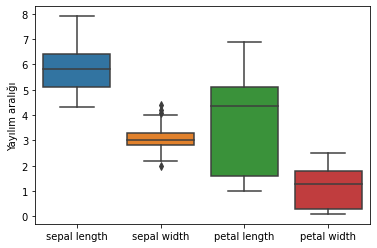

In [ ]:
sns.boxplot(data=df)
plt.ylabel("Yayılım aralığı")

Bu grafikten her bir özniteliğin hangi aralıklarda yayılım gösterdiğini anlarız. Kutuların ortasındaki çizgi ise medyan değeridir.

**Scattter Plot**

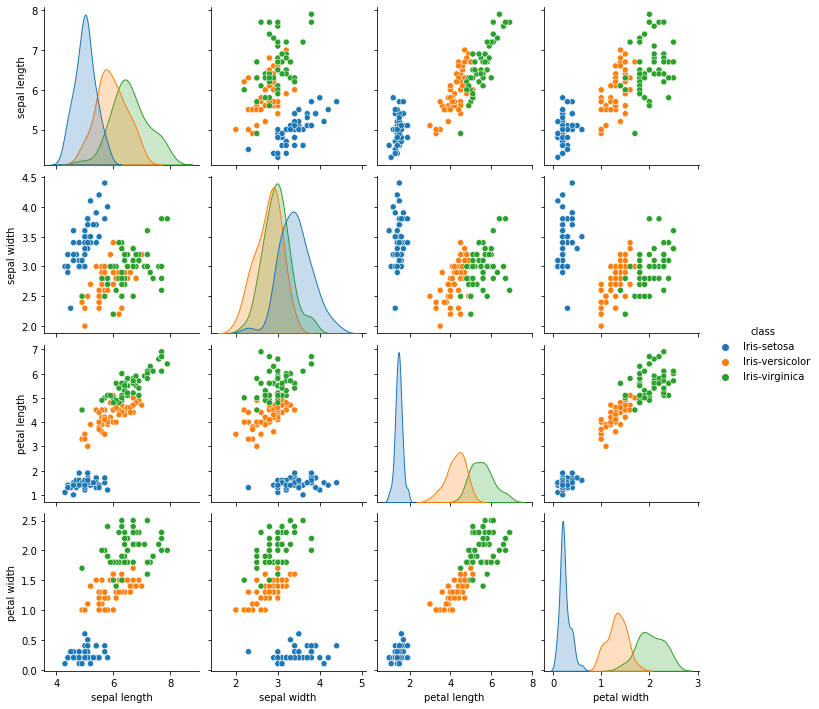

In [ ]:
sns.pairplot(df,hue = 'class',diag_kind = "kde",kind = "scatter")
plt.show()

Köşegen üzerindeki graifk, tek bir değişkenin dağılımını görmemize izin verirken, diğer dağılım grafikleri iki değişken arasındaki ilişkiyi gösterir.


Güçlü pozitif ilişki: İki değişkenin değerleri de aynı anda artar ve noktalar çizginin yakınında kümelenmiştir.

Zayıf pozitif ilişki: İki değişkenin değerleri de aynı anda artar fakat noktalar dağınık haldedir.

Güçlü negatif ilişki: Bir değişkenin değeri artarken diğeri azalır ve noktalar çizginin yakınında kümelenmiştir.

Zayıf negatif ilişki: Bir değişkenin değeri artarken diğeri azalır fakat noktalar dağınık haldedir.

Karmaşık ilişki: Değişkenler arası bir ilişki olduğu görülmekte ama ilişkinin yönü tam olarak tespit edilememektedir.

İlişki yok: İki değişkenin birbiriyle arasında bir ilişki yoktur.

Fonksiyon parametreleri

1.

data: df olarak tanımladık.

2.

hue: Farklı renkler elde etmek için verimizdeki değişkenleri kullandık. Iris çiçeğinin class sutünunda 3 farlı türü mevcut.

3.

palette: Ton değişkenini eşlemek için renk seti. Herhangi bir parametre vermezseniz varsayılan değeri kendi atamaktadır.

4.
kind: Grafiğin türünü belirler. İkili ilişkileri gözlemlemek için scatter kullandım.

5.
diag_kind: Köşegen çizimlerini nasıl bir grafikle çizdirmemiz gerektiğini gösteren bir parametre.




**Paralel Kordinatlar**

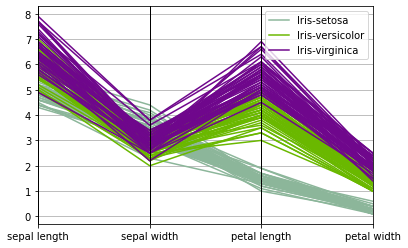

In [10]:
pd.plotting.parallel_coordinates(df,'class')

Grafikten çıkarımımız:

Iris setosa türü diğerlerinden kolayca ayrıştırılabilir. Çünkü petal length ve petal width değerlerine göre diğer iki türden keskin bir şekilde ayrıldığı görülüyor.

## Kaynakça

[Iris veri seti nedir?](https://en.wikipedia.org/wiki/Iris_flower_data_set)

[Box plot](https://tr.wikipedia.org/wiki/Kutu_grafi%C4%9Fi)

[Pairplot](https://www.tutorialspoint.com/seaborn/seaborn_visualizing_pairwise_relationship.htm)

[Serpileme grafiği (Scatter plot)](https://tr.wikipedia.org/wiki/Serpilme_diyagram%C4%B1)